# FLIPPED PSF

We will convolute the image of the caustics obtained by two leds with the PSF'. The PSF' is the image of the PSF where you flip the left and the right, and the top and the bottom.   

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from scipy import signal
from PIL import Image

We upload the two leds image and convert it to an array

In [2]:
i0 = Image.open('images/i0_0001.jpg')
realsize=i0.size
print(realsize)
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
print(newsize)
i0=i0.resize(newsize,Image.ANTIALIAS)
i0 = np.array(i0)
i0 = i0[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
print(i0.shape) #[Y,X]
print('i0(t) imported and reduced correctly!')

(3280, 2464)
(820, 616)
(616, 820)
820
616
i0(t) imported and reduced correctly!


We upload the filter (PSF) and convert it to an array. Finally, we flip it.

In [6]:
h = Image.open('images/h_0001.jpg')
realsize=h.size
print(realsize)
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
print(newsize)
h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h)
h = h[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
size_x = len(h[0])
size_y = len(h)
print(h.shape) #[Y,X]
print(size_x)
print(size_y)
print('h(t) imported and reduced correctly!')

# FLIP:
hf = np.flip(h, axis=None)
print("Flipped!")

# # Plotting
# fig = plt.figure()

# ax = fig.add_subplot(1, 2, 1)
# plt.imshow(h, cmap='gray')
# plt.title('h(t)')

# ax = fig.add_subplot(1, 2, 2)
# plt.imshow(hf, cmap='gray')
# plt.title('x(t)')

# plt.show()

(3280, 2464)
(820, 616)
(616, 820)
820
616
h(t) imported and reduced correctly!
Flipped!


Since everything is correctly loaded, we compute the convolution.

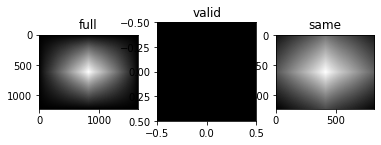

In [8]:
i_s_full=signal.fftconvolve(i0, h,mode='full') #We filter it with h(t)
i_s_valid=signal.fftconvolve(i0, h,mode='valid') #We filter it with h(t)
i_s_same=signal.fftconvolve(i0, h,mode='same') #We filter it with h(t)

# Plotting
fig = plt.figure()

ax = fig.add_subplot(1, 3, 1)
plt.imshow(i_s_full, cmap='gray')
plt.title('full')

ax = fig.add_subplot(1, 3, 2)
plt.imshow(i_s_valid, cmap='gray')
plt.title('valid')

ax = fig.add_subplot(1, 3, 3)
plt.imshow(i_s_same, cmap='gray')
plt.title('same')

plt.show()

In [11]:
print(i_s_full.shape)
print(i_s_same.shape)
print(h.shape)

(1231, 1639)
(616, 820)
(616, 820)


In [12]:
print(i_s_valid)

[[9.21770669e+09]]
